# Import Data and Libraries 

In [59]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy 

In [60]:
# path variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\Instacart Basket Analysis'

# Import ords_prods_merge_aggregated dataframe 
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_aggregated.pkl'))

# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

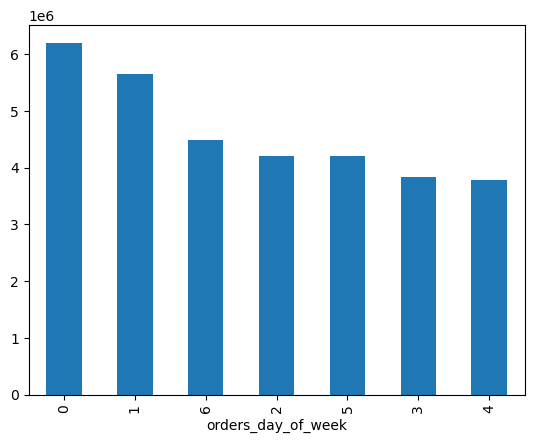

In [62]:
# Create a bar chart
df_ords_prods['orders_day_of_week'].value_counts().plot.bar()

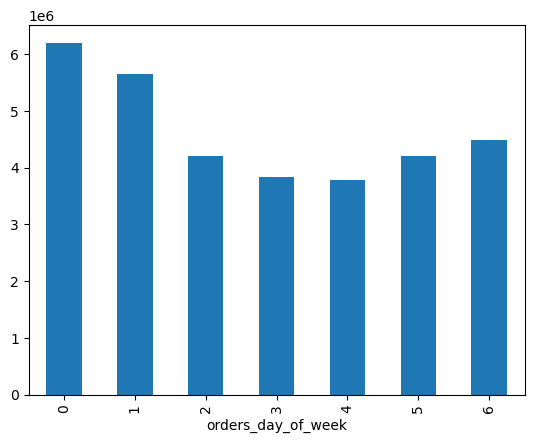

In [63]:
# sort_index function sorts the bars according to index order (rather than largest to smallest) 
bar = df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [64]:
# When printing frequencies, the same sort_index function can be used as well 
df_ords_prods['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [65]:
# Printing frequencies with sort_index function 
df_ords_prods['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

In [66]:
dow_dict = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
df_ords_prods['day_of_week'] = df_ords_prods['orders_day_of_week'].map(dow_dict)

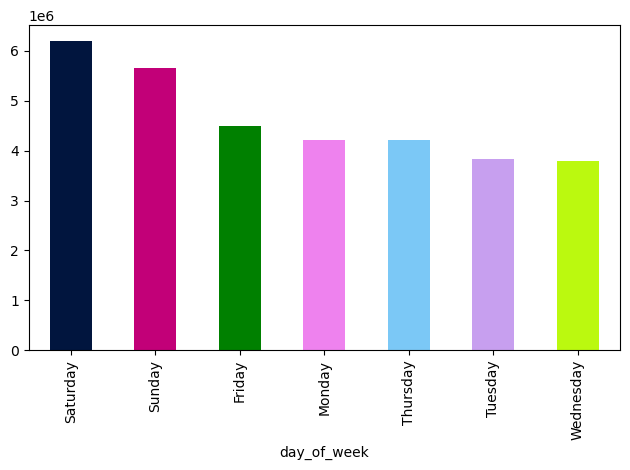

In [67]:
# Adding colors to bar chart
bar = df_ords_prods['day_of_week'].value_counts().plot.bar(color = [ '#01153E', '#C20078', '#008000', '#EE82EE', '#7BC8F6', '#C79FEF', '#BBF90F'])
plt.tight_layout()
plt.show()

In [68]:
# Export Bar Chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

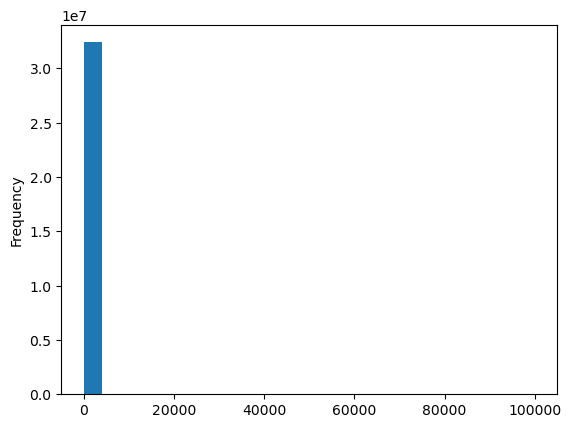

In [70]:
# Create a histogram of the 'prices' column 
df_ords_prods['prices'].plot.hist(bins = 25)

Histogram comes back not looking as it is supposed to; 1 column instead of 25. 

In [72]:
# Perform a data consistency check to analyze why the data appears like so in the histogram 
df_ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Maximum value appear to be off 

In [74]:
# Further analyze statistics 
df_ords_prods['prices'].mean() 

11.980225638383445

In [75]:
df_ords_prods['prices'].median()

7.4

In [76]:
df_ords_prods['prices'].max()

99999.0

Mean and median appear to be realistic. Max value is off which is what is effecting the histogram 

<Axes: xlabel='prices', ylabel='prices'>

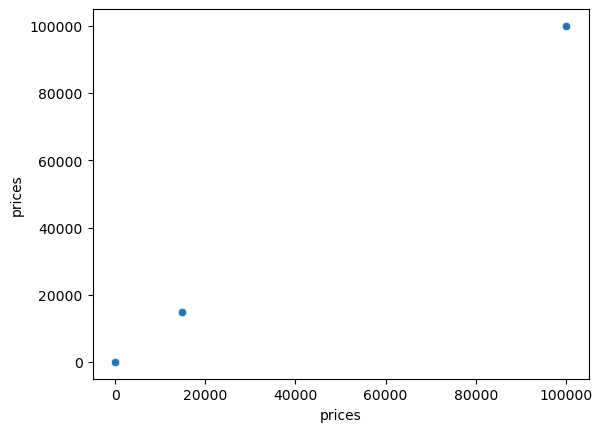

In [78]:
# Create a scatter plot to determine if there are any outliers in 'price' column
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods)

In [79]:
pd.set_option('display.max_columns', None)

In [80]:
# Run exploratory data analysis checks on outliers
df_ords_prods.loc[df_ords_prods['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spent,spent_flag,customer_frequency,frequency_flag,day_of_week
1576,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Monday
1638,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer,Friday
16522,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,Monday
16528,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer,Saturday
53672,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer,Sunday
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer,Thursday
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,13.0,Regular customer,Wednesday
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer,Monday


Can be assumed that the 14,900 and 99,999 values are skewing the charts

In [82]:
# mark the outliers as missing since they don't make sense in terms of other values in the column
df_ords_prods.loc[df_ords_prods['prices'] > 100, 'prices'] = np.nan

In [83]:
df_ords_prods['prices'].max()

25.0

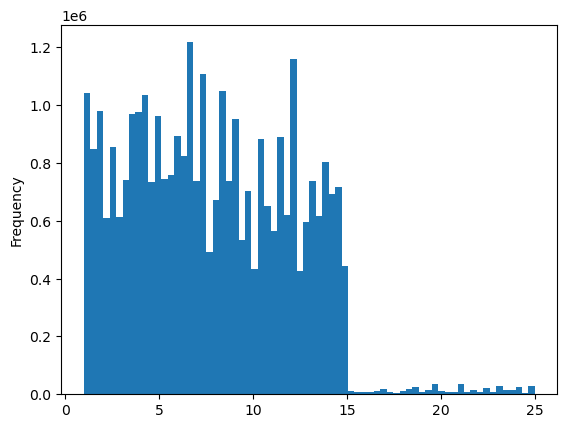

In [84]:
# Create a historgram 
hist = df_ords_prods['prices'].plot.hist(bins = 70)

In [85]:
# Export histogram 
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_prices.png'))

# Creating Line Charts

In [87]:
# Create a list holding true / false values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [88]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [89]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [90]:
# Store 70% of the sample in the dataframe big 
big = df_ords_prods[dev]

In [91]:
# Store 30% of the sample in the dataframe small 
small = df_ords_prods[~dev]

In [92]:
# Verify results using len() function to see if the numbers match 
len(df_ords_prods)

32404859

In [93]:
# Add big and small frame to see if it matches the total of the original data 
len(big) + len(small)

32404859

In [94]:
# reduce sample to necessary columns; orders_day_of_week and prices 
df_2 = small[['orders_day_of_week', 'prices']]

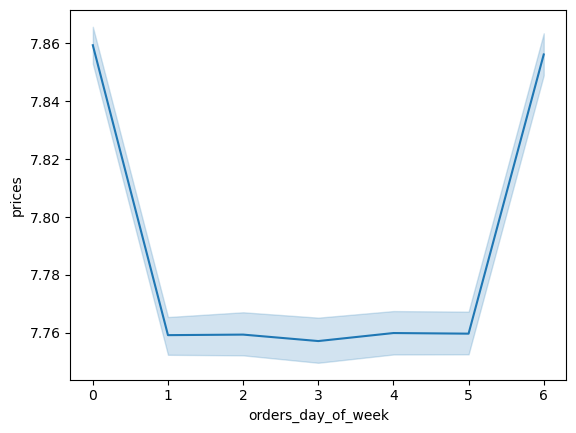

In [95]:
# Create a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')